In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [2]:
# Mock sample dataset
data = {
    'rainfall': np.random.uniform(300, 800, 100),
    'temperature': np.random.uniform(15, 35, 100),
    'soil_type_encoded': np.random.randint(0, 3, 100),
    'yield': np.random.uniform(2, 5, 100)
}

df = pd.DataFrame(data)
df.head()


,rainfall,temperature,soil_type_encoded,yield
0,411.863006,16.043971,2,4.178484
1,318.228562,16.091829,1,3.470484
2,565.975090,28.780588,2,3.318579
3,794.699312,19.112005,2,2.788440
4,725.968814,34.540348,2,2.143794


In [3]:
from google.colab import files
uploaded = files.upload()


Saving yield_df.csv to yield_df.csv


In [4]:
import pandas as pd

df = pd.read_csv('yield_df.csv')  # Change the filename if different
df.head()


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [6]:
df.isnull().sum()


,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [7]:
from sklearn.preprocessing import LabelEncoder

le_area = LabelEncoder()
le_item = LabelEncoder()

df['Area_encoded'] = le_area.fit_transform(df['Area'])
df['Item_encoded'] = le_item.fit_transform(df['Item'])


In [8]:
X = df[['average_rain_fall_mm_per_year', 'avg_temp', 'pesticides_tonnes', 'Area_encoded', 'Item_encoded']]
y = df['hg/ha_yield']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² score: {r2:.2f}")


Linear Regression Results:
MAE: 62443.20
RMSE: 81779.34
R² score: 0.08


In [11]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² score: {r2_rf:.2f}")


Random Forest Regression Results:
MAE: 5622.64
RMSE: 14004.08
R² score: 0.97


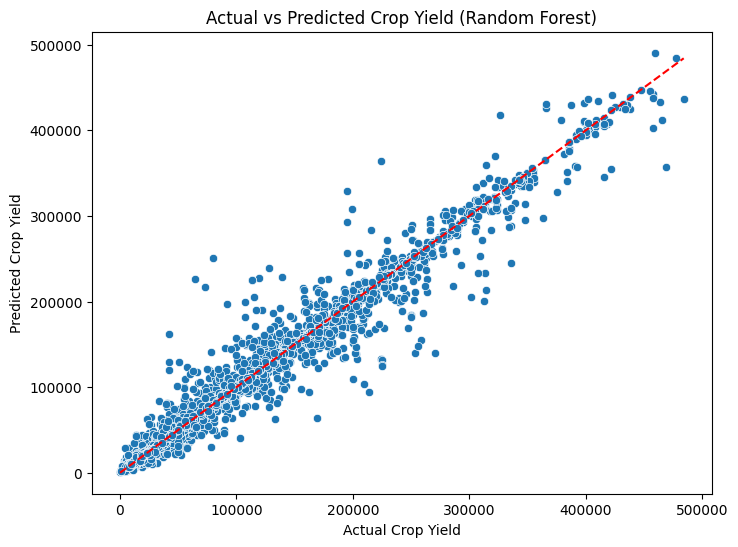

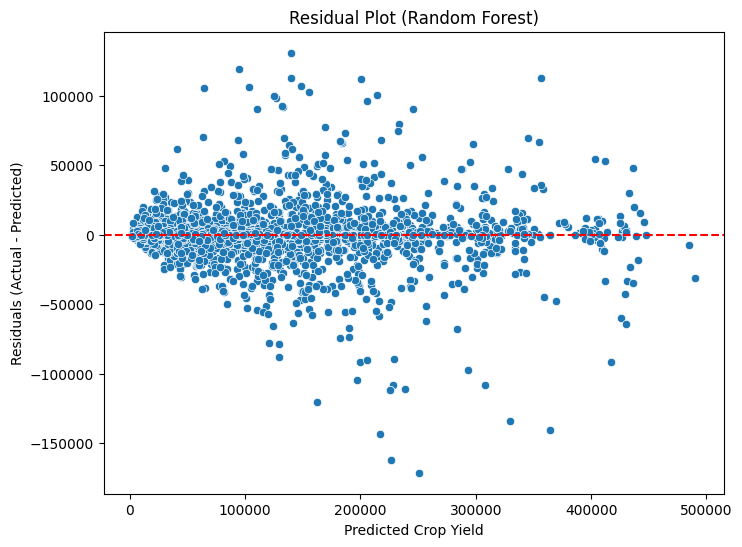

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs Predicted plot for Random Forest (better model)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.title("Actual vs Predicted Crop Yield (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

# Residual plot (errors)
residuals = y_test - y_pred_rf

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Crop Yield")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Random Forest)")
plt.show()


In [13]:
print("Actual yield range:", y_test.min(), "-", y_test.max())
print("Predicted yield range:", y_pred_rf.min(), "-", y_pred_rf.max())


Actual yield range: 200 - 483955
Predicted yield range: 1560.18 - 490448.96


In [14]:
rf_model_tuned = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf_model_tuned.fit(X_train, y_train)
y_pred_tuned = rf_model_tuned.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Tuned RF Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_tuned))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tuned)))
print("R2:", r2_score(y_test, y_pred_tuned))


Tuned RF Model Performance:
MAE: 6120.73806501231
RMSE: 14020.311758754367
R2: 0.9729007401213903
